(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week09/notebook/demo.ipynb)

# Imbalanced Data

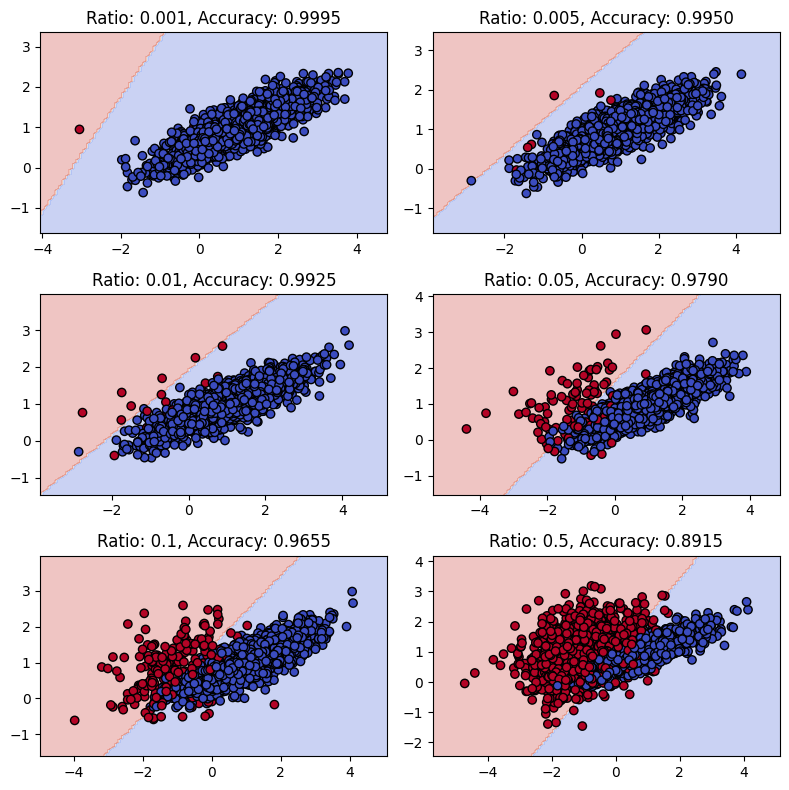

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

def generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.05, random_state=1):
    X, y = make_classification(n_samples=n_sample, n_features=2, n_redundant=0, n_clusters_per_class=1,
                               weights=[1 - minority_ratio], class_sep=1, flip_y=0, random_state=random_state)
    return X, y

# Function to plot decision boundaries
def plot_decision_boundaries(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

inputs_to_visualize = []
for minority_ratio in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
    # Generate an imbalanced dataset
    X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=minority_ratio)
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)
    # Fit a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # Check the accuracy
    accuracy = accuracy_score(y_test, model.predict(X_test))
    # Store the input data for visualization
    inputs_to_visualize.append((minority_ratio, model, X_test, y_test, accuracy))

# visualize all in a 1x3 grid
nrow, ncol = 3, 2
fig, axes = plt.subplots(nrow, ncol, figsize=(8, 8))
for i, (minority_ratio, model, X_input, y_input, accuracy) in enumerate(inputs_to_visualize):
    plot_decision_boundaries(model, X_input, y_input, axes[i//ncol][i%ncol], f"Ratio: {minority_ratio}, Accuracy: {accuracy:.4f}")
plt.tight_layout()
plt.show()


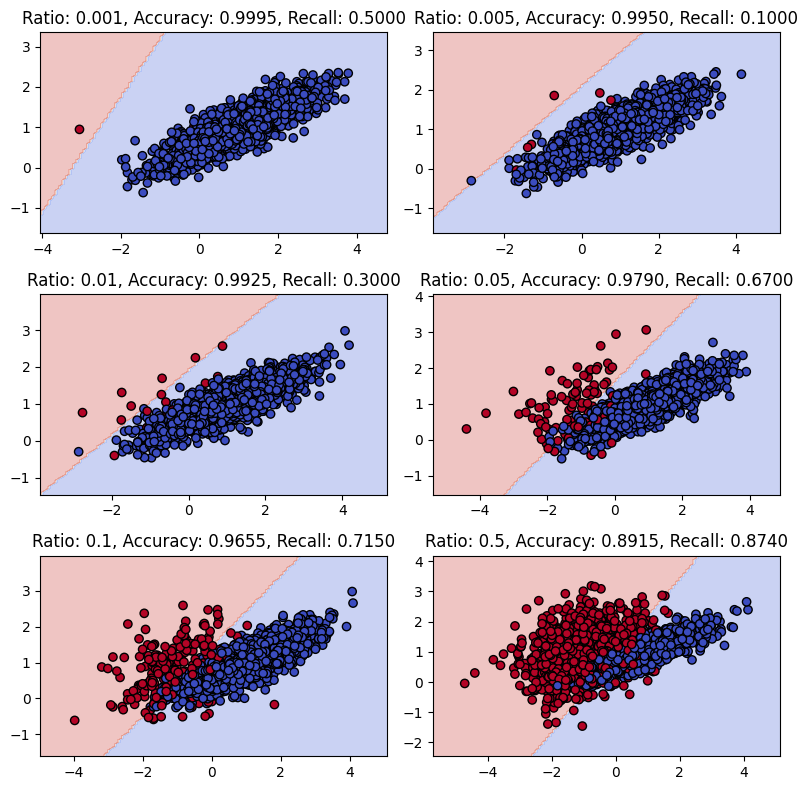

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

def generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.05, random_state=1):
    X, y = make_classification(n_samples=n_sample, n_features=2, n_redundant=0, n_clusters_per_class=1,
                               weights=[1 - minority_ratio], class_sep=1, flip_y=0, random_state=random_state)
    return X, y

# Function to plot decision boundaries
def plot_decision_boundaries(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

inputs_to_visualize = []
for minority_ratio in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
    # Generate an imbalanced dataset
    X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=minority_ratio)
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)
    # Fit a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # Check the accuracy and recall
    accuracy = accuracy_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    # Store the input data for visualization
    inputs_to_visualize.append((minority_ratio, model, X_test, y_test, accuracy, recall))

# visualize all in a 1x3 grid
nrow, ncol = 3, 2
fig, axes = plt.subplots(nrow, ncol, figsize=(8, 8))
for i, (minority_ratio, model, X_input, y_input, accuracy, recall) in enumerate(inputs_to_visualize):
    plot_decision_boundaries(model, X_input, y_input, axes[i//ncol][i%ncol], f"Ratio: {minority_ratio}, Accuracy: {accuracy:.4f}, Recall: {recall:.4f}")
plt.tight_layout()
plt.show()


# Model Evaluation with Imbalanced Data

- Cross validation score prameter [[doc](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)]

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01)
lr = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
roc_aucs = cross_val_score(lr, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
accuracies = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
recalls = cross_val_score(lr, X, y, scoring='recall', cv=cv, n_jobs=-1)
f1s = cross_val_score(lr, X, y, scoring='f1', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.4f' % np.mean(roc_aucs))
print('Mean Accuracy: %.4f' % np.mean(accuracies))
print('Mean Recall: %.4f' % np.mean(recalls))
print('Mean F1: %.4f' % np.mean(f1s))

Mean ROC AUC: 0.9449
Mean Accuracy: 0.9946
Mean Recall: 0.4967
Mean F1: 0.6288


## ROC-AUC

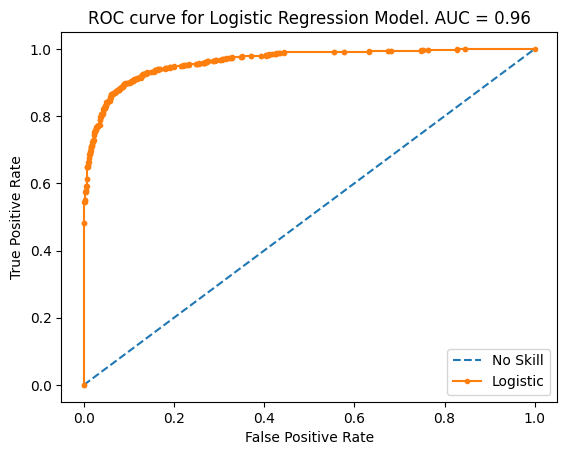

In [4]:
# example of a roc curve for a predictive model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# generate 2 class dataset
X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.5)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
# fit a model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# predict probabilities
yhat = lr.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for the model
fpr, tpr, thresholds = roc_curve(y_test, pos_probs)
roc_auc_lr = roc_auc_score(y_test, pos_probs)
# plot lr roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title(f'ROC curve for Logistic Regression Model. AUC = {roc_auc_lr:.2f}')
plt.show()

In [5]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='stratified')
dc.fit(X_train, y_train)
yhat_dummy = dc.predict_proba(X_test)
pos_probs_dummy = yhat_dummy[:, 1]
# calculate roc auc
roc_auc_dummy = roc_auc_score(y_test, pos_probs_dummy)
print(f'ROC AUC = {roc_auc_dummy:.2f}')

ROC AUC = 0.51


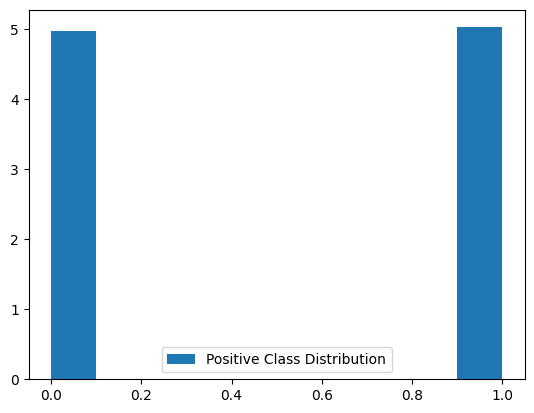

In [6]:
pos_probs_dummy = yhat_dummy[:, 1]

plt.hist(pos_probs_dummy, bins=10, label='Positive Class Distribution', density=True)
plt.legend()
plt.show()

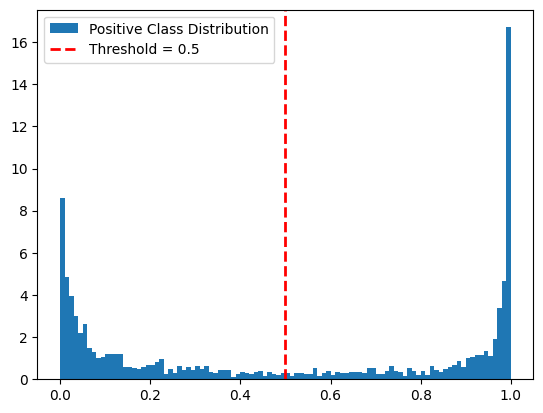

In [7]:
pos_probs = yhat[:, 1]
neg_probs = yhat[:, 0]

plt.hist(pos_probs, bins=100, label='Positive Class Distribution', density=True)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold = 0.5')
plt.legend()
plt.show()

In [8]:
recall = recall_score(y_test, lr.predict(X_test))
print(f"Recall: {recall}")

Recall: 0.891


In [9]:
np.sum(pos_probs>=0.5), np.sum(pos_probs<0.5)

(np.int64(978), np.int64(1022))

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


|               | Negative Prediction | Positive Prediction |
|--------------|--------------------|--------------------|
| **Negative Class** | True Negative (TN)  | False Positive (FP) |
| **Positive Class** | False Negative (FN) | True Positive (TP) |

In [10]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, lr.predict(X_test))
print(matrix)

[[913  87]
 [109 891]]


## PR-AUC

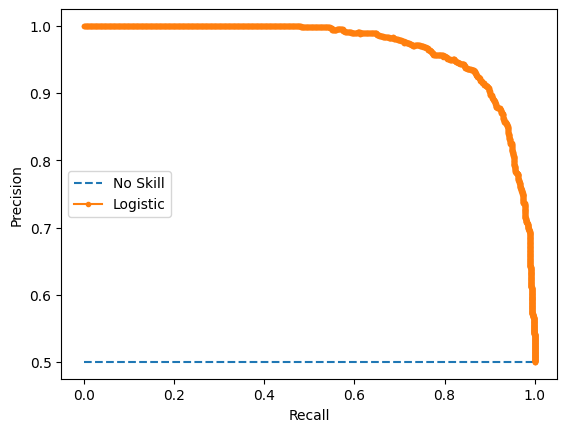

In [11]:
from sklearn.metrics import precision_recall_curve

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [12]:
from sklearn.metrics import auc

auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)

PR AUC: 0.968


In [13]:


precision_dummy, recall_dummy, _ = precision_recall_curve(y_test, pos_probs_dummy)
auc_score = auc(recall_dummy, precision_dummy)
print('PR AUC: %.3f' % auc_score)

PR AUC: 0.630


## Severly Imbalanced Data

### ROC-AUC

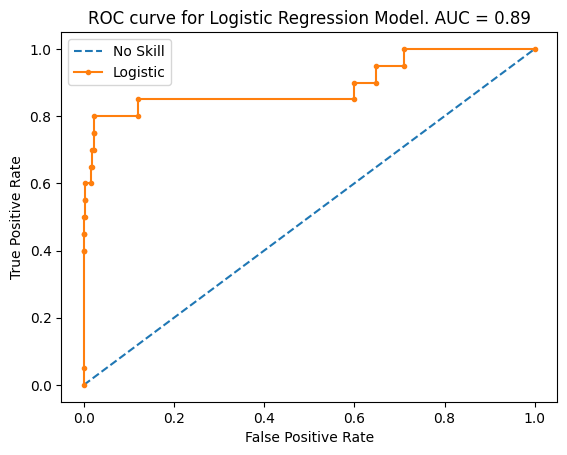

In [14]:
# example of a roc curve for a predictive model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# generate 2 class dataset
X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
# fit a model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# predict probabilities
yhat = lr.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for the model
fpr, tpr, thresholds = roc_curve(y_test, pos_probs)
roc_auc_lr = roc_auc_score(y_test, pos_probs)
# plot lr roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title(f'ROC curve for Logistic Regression Model. AUC = {roc_auc_lr:.2f}')
plt.show()

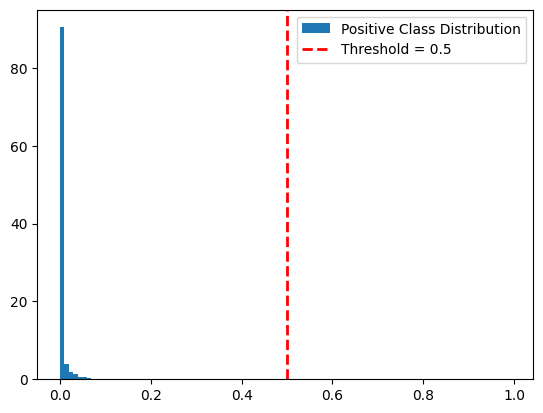

In [15]:
pos_probs = yhat[:, 1]

plt.hist(pos_probs, bins=100, label='Positive Class Distribution', density=True)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold = 0.5')
plt.legend()
plt.show()

In [16]:
recall = recall_score(y_test, lr.predict(X_test))
print(f"Recall: {recall}")

Recall: 0.35


In [17]:
np.sum(pos_probs>=0.5), np.sum(pos_probs<0.5)

(np.int64(7), np.int64(1993))

In [18]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, lr.predict(X_test))
print(matrix)

[[1980    0]
 [  13    7]]


In [19]:
7 / 20

0.35

### PR-AUC

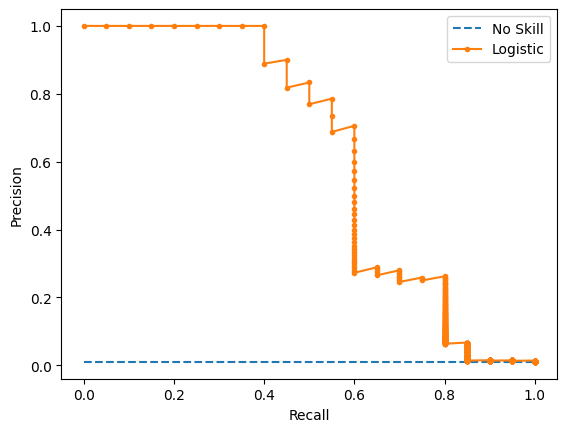

In [20]:
from sklearn.metrics import precision_recall_curve

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

To explain why the ROC and PR curves tell a different story, recall that the PR curve focuses on the minority class, whereas the ROC curve covers both classes.

In [21]:
from sklearn.metrics import auc

auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)

PR AUC: 0.618


# SMOTE (Synthetic Minority Over-sampling Technique)

In [22]:
import imblearn

imblearn.__version__

'0.13.0'

Counter({np.int64(0): 9900, np.int64(1): 100})


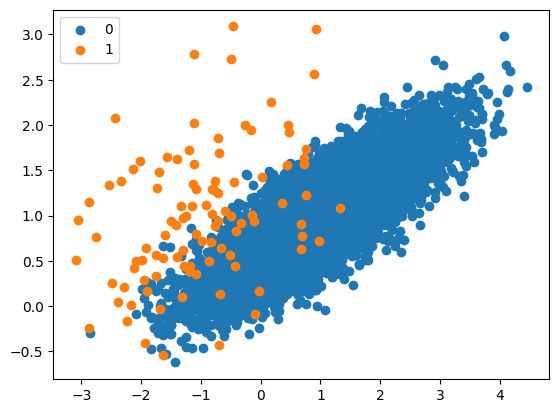

In [23]:
from collections import Counter

# define dataset
X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

for label in counter:
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
plt.legend()
plt.show()

Counter({np.int64(0): 9900, np.int64(1): 9900})


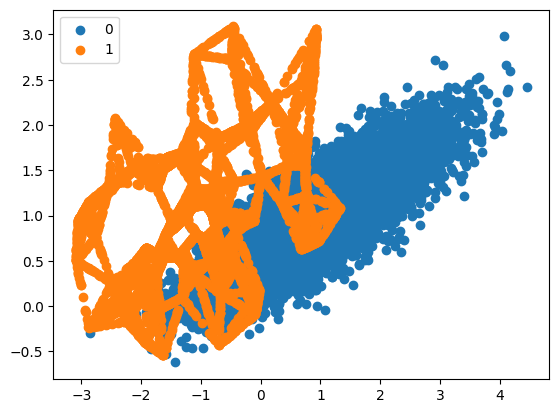

In [24]:
from imblearn.over_sampling import SMOTE

X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01, random_state=1)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label in counter:
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
plt.legend()
plt.show()

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

Counter({np.int64(0): 9900, np.int64(1): 100})
Counter({np.int64(0): 9900, np.int64(1): 990})


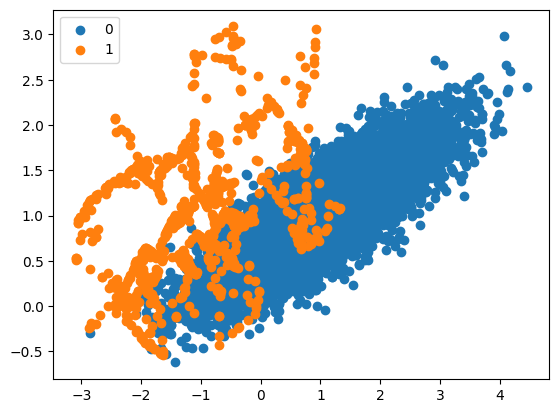

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01, random_state=1)
counter = Counter(y)
print(counter)

over = SMOTE(sampling_strategy=0.1)
X, y = over.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label in counter:
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
plt.legend()
plt.show()

Counter({np.int64(0): 9900, np.int64(1): 100})
Counter({np.int64(0): 1980, np.int64(1): 990})


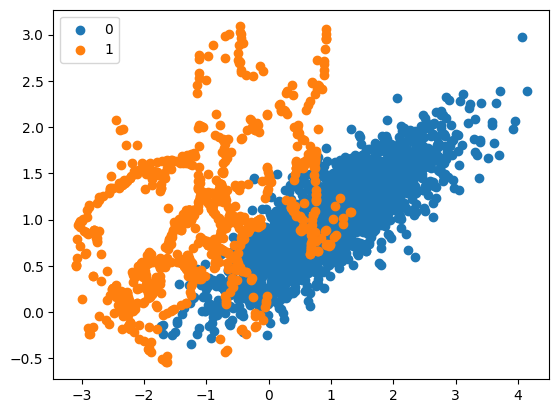

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01, random_state=1)
counter = Counter(y)
print(counter)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label in counter:
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()